In [55]:
# Let's load pandas and see the first few rows of the dataset for COVID-19 project.
import pandas as pd
import os
import sys
covid = pd.read_csv('https://raw.githubusercontent.com/bradley1958/DATA695/master/BRAD_REVISED_COVID_DATASET.csv')
covid.head()



,PATIENT ID,GENDER BINARY,GENDER,AGE,AGE 60 PLUS,60 PLUS YES/NO,COVID TEST BINARY,COVID TEST RESULTS,ONSET TO HOSP ADMIT DAYS,TRANSFER TO ICU IN DAYS,72HRS TO ICU,72HRS TO ICU BINARY,ADMIT CRP LEVEL,ABNORMAL CRP YES/NO,BLOOD CRP ABNORMAL,ADMIT ESR LEVEL,ABNORMAL ESR YES/NO,BLOOD ESR ABNORMAL,ADMIT INR LEVEL,ABNORMAL INR YES/NO,BLOOD INR ABNORMAL,ADMIT PT LEVEL,ABNORMAL PT YES/NO,BLOOD PT ABNORMAL,ADMIT FIBRINOGEN,ABNORMAL FIBRINOGEN YES/NO,BLOOD FIBRINOGEN ABNORMAL,ADMIT CHEST CT PERCENTAGE OBSTRUCTED,ADMIT CHEST CT GREATER 25 PERCENT,CHEST CT GREATER 25 PERCENT BINARY,VENTILATION BINARY,VENTILATION YES/NO,LOSS SMELL TASTE BINARY,LOSS SMELL TASTE YES/NO,ADMIT PLATELET COUNT,ABNORMAL PLATELET YES/NO,BLOOD PLATELET ABNORMAL,CHEST CT PERCENT POST TREAT 7DAYS,ABNORMAL CHEST CT POST TREAT 7DAYS BINARY,CRP POST TREAT 7DAYS,COUGH BINARY,COUGH YES/NO,DIARRHEA BINARY,DIARRHEA YES/NO,ADMIT LABORED BREATHING BINARY,DYSPNEA YES/NO,SMOKER BINARY,SMOKER YES/NO,PULSE OX BELOW 88,PULSE OX BELOW 88 YES/NO,TEMP ABOVE 103 BINARY,TEMP ABOVE 103 YES/NO,OBESE BINARY,OBESE YES/NO,SORE THROAT BINARY,SORE THROAT YES/NO
0,P1,1,Male,70,1,Yes,1,Positive,7,0,Yes,1,112,Yes,1,40,Yes,1,1.10,No,0,12.00,No,0,5.46,Yes,1,40,Yes,1,0,No,1,Yes,161,No,0,7,0,28,1,Yes,0,No,0,No,0,No,0,No,0,No,0,No,0,No
1,P2,1,Male,46,0,No,1,Positive,10,0,Yes,1,72,Yes,1,39,Yes,1,1.39,Yes,1,15.10,Yes,1,5.00,Yes,1,35,Yes,1,1,Yes,0,No,306,No,0,12,0,28,0,No,0,No,0,No,0,No,0,Yes,0,No,0,No,0,No
2,P3,1,Male,94,1,Yes,1,Positive,3,0,Yes,1,84,Yes,1,38,Yes,1,1.08,No,0,11.80,No,0,2.98,No,0,75,Yes,1,1,Yes,0,No,199,No,0,20,0,25,0,No,0,No,0,No,0,No,1,Yes,0,No,0,No,0,No
3,P4,1,Male,74,1,Yes,1,Positive,11,0,Yes,1,69,Yes,1,37,Yes,1,1.27,No,0,13.94,Yes,1,4.94,Yes,1,40,Yes,1,1,Yes,0,No,97,Yes,1,90,1,44,1,Yes,0,No,1,Yes,1,Yes,1,Yes,1,Yes,1,Yes,1,Yes
4,P5,1,Male,53,0,Yes,1,Positive,8,0,Yes,1,135,Yes,1,50,Yes,1,1.43,No,0,15.50,Yes,1,6.87,Yes,1,40,Yes,1,1,Yes,0,No,302,No,0,36,1,65,0,No,0,No,1,Yes,1,Yes,1,Yes,1,Yes,1,Yes,1,Yes


This is our revised CoVid-19 Dataset with revised Column Headings

Next, let's look at the structure of our COVID Dataset.


In [24]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PATIENT ID                                 350 non-null    object 
 1   GENDER BINARY                              350 non-null    int64  
 2   GENDER                                     350 non-null    object 
 3   AGE                                        350 non-null    int64  
 4   AGE 60 PLUS                                350 non-null    int64  
 5   60 PLUS YES/NO                             350 non-null    object 
 6   COVID TEST BINARY                          350 non-null    int64  
 7   COVID TEST RESULTS                         350 non-null    object 
 8   ONSET TO HOSP ADMIT DAYS                   350 non-null    int64  
 9   TRANSFER TO ICU IN DAYS                    350 non-null    int64  
 10  72HRS TO ICU              

We see above that we have a dataset with 350 records by 55 columns. The dtypes are "float64" at 3, "int64" at 31, and "object" at 22. We also see that we have no "null" values to deal with. If we had missing values I would have taken the median value for each column heading containing "null' values and subsituted that column's median value for missing data points within a specific column. Next, let's pull some discriptive statistics about our data points.

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import numpy as np
from sklearn import metrics
import scipy.stats as stats
from pandas import set_option
import pandas.util.testing as tm
plt.style.use('ggplot')

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(covid.describe().T)


SUMMARY STATISTICS OF NUMERIC COLUMNS

                                           count        mean  ...     75%     max
GENDER BINARY                              350.0    0.577143  ...    1.00    1.00
AGE                                        350.0   57.805714  ...   69.00   94.00
AGE 60 PLUS                                350.0    0.460000  ...    1.00    1.00
COVID TEST BINARY                          350.0    0.677143  ...    1.00    1.00
ONSET TO HOSP ADMIT DAYS                   350.0    8.157143  ...   10.00   28.00
TRANSFER TO ICU IN DAYS                    350.0    2.445714  ...    4.00   14.00
72HRS TO ICU BINARY                        350.0    0.754286  ...    1.00    1.00
ADMIT CRP LEVEL                            350.0   95.091429  ...  155.00  328.00
BLOOD CRP ABNORMAL                         350.0    0.948571  ...    1.00    1.00
ADMIT ESR LEVEL                            350.0   40.711429  ...   57.75  158.00
BLOOD ESR ABNORMAL                         350.0    0.64857

From our descriptive statistics let's focus on the following columns: AGE, ONSET TO HOSP ADMIT DAYS, ADMIT CRP LEVEL, ADMIT ESR LEVEL, ADMIT INR LEVEL, ADMIT PT LEVEL, ADMIT FIBRINOGEN, ADMIT CHECT CT PERCENTAGE, ADMIT PLATELET COUNT, CHEST CT PERCENT POST TREAT 7DAYS, and CRP POST TREAT 7DAYS.  To do this I will take a slice from the master dataset.


In [57]:
stats_subset = covid[['AGE','ONSET TO HOSP ADMIT DAYS','TRANSFER TO ICU IN DAYS','ADMIT CRP LEVEL','ADMIT ESR LEVEL','ADMIT INR LEVEL','ADMIT PT LEVEL','ADMIT FIBRINOGEN','ADMIT CHEST CT PERCENTAGE OBSTRUCTED','ADMIT PLATELET COUNT','CHEST CT PERCENT POST TREAT 7DAYS','CRP POST TREAT 7DAYS']]
stats_subset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   AGE                                   350 non-null    int64  
 1   ONSET TO HOSP ADMIT DAYS              350 non-null    int64  
 2   TRANSFER TO ICU IN DAYS               350 non-null    int64  
 3   ADMIT CRP LEVEL                       350 non-null    int64  
 4   ADMIT ESR LEVEL                       350 non-null    int64  
 5   ADMIT INR LEVEL                       350 non-null    float64
 6   ADMIT PT LEVEL                        350 non-null    float64
 7   ADMIT FIBRINOGEN                      350 non-null    float64
 8   ADMIT CHEST CT PERCENTAGE OBSTRUCTED  350 non-null    int64  
 9   ADMIT PLATELET COUNT                  350 non-null    int64  
 10  CHEST CT PERCENT POST TREAT 7DAYS     350 non-null    int64  
 11  CRP POST TREAT 7DAY

In [ ]:
stats_subset.describe()

,AGE,ONSET TO HOSP ADMIT DAYS,TRANSFER TO ICU IN DAYS,ADMIT CRP LEVEL,ADMIT ESR LEVEL,ADMIT INR LEVEL,ADMIT PT LEVEL,ADMIT FIBRINOGEN,ADMIT CHEST CT PERCENTAGE OBSTRUCTED,ADMIT PLATELET COUNT,CHEST CT PERCENT POST TREAT 7DAYS,CRP POST TREAT 7DAYS
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,57.805714,8.157143,2.445714,95.091429,40.711429,1.274714,13.908171,4.897000,51.280000,181.397143,35.737143,63.942857
std,15.113779,4.885027,2.898705,65.601451,24.116471,0.151545,1.653061,1.133649,15.765342,72.373272,31.389859,53.396362
min,20.000000,1.000000,0.000000,1.000000,1.000000,0.980000,10.700000,1.240000,10.000000,38.000000,0.000000,0.000000
25%,47.000000,5.000000,0.000000,36.000000,22.000000,1.180000,12.900000,4.332500,40.000000,134.500000,7.000000,36.000000
50%,58.500000,7.000000,1.000000,86.500000,40.000000,1.260000,13.750000,4.940000,52.000000,169.000000,36.000000,56.000000
75%,69.000000,10.000000,4.000000,155.000000,57.750000,1.340000,14.500000,5.200000,60.000000,217.500000,58.750000,65.000000
max,94.000000,28.000000,14.000000,328.000000,158.000000,1.920000,20.600000,11.480000,92.000000,493.000000,100.000000,323.000000


Next, let's see if we can do a Correlation Matrix on our two datasets.

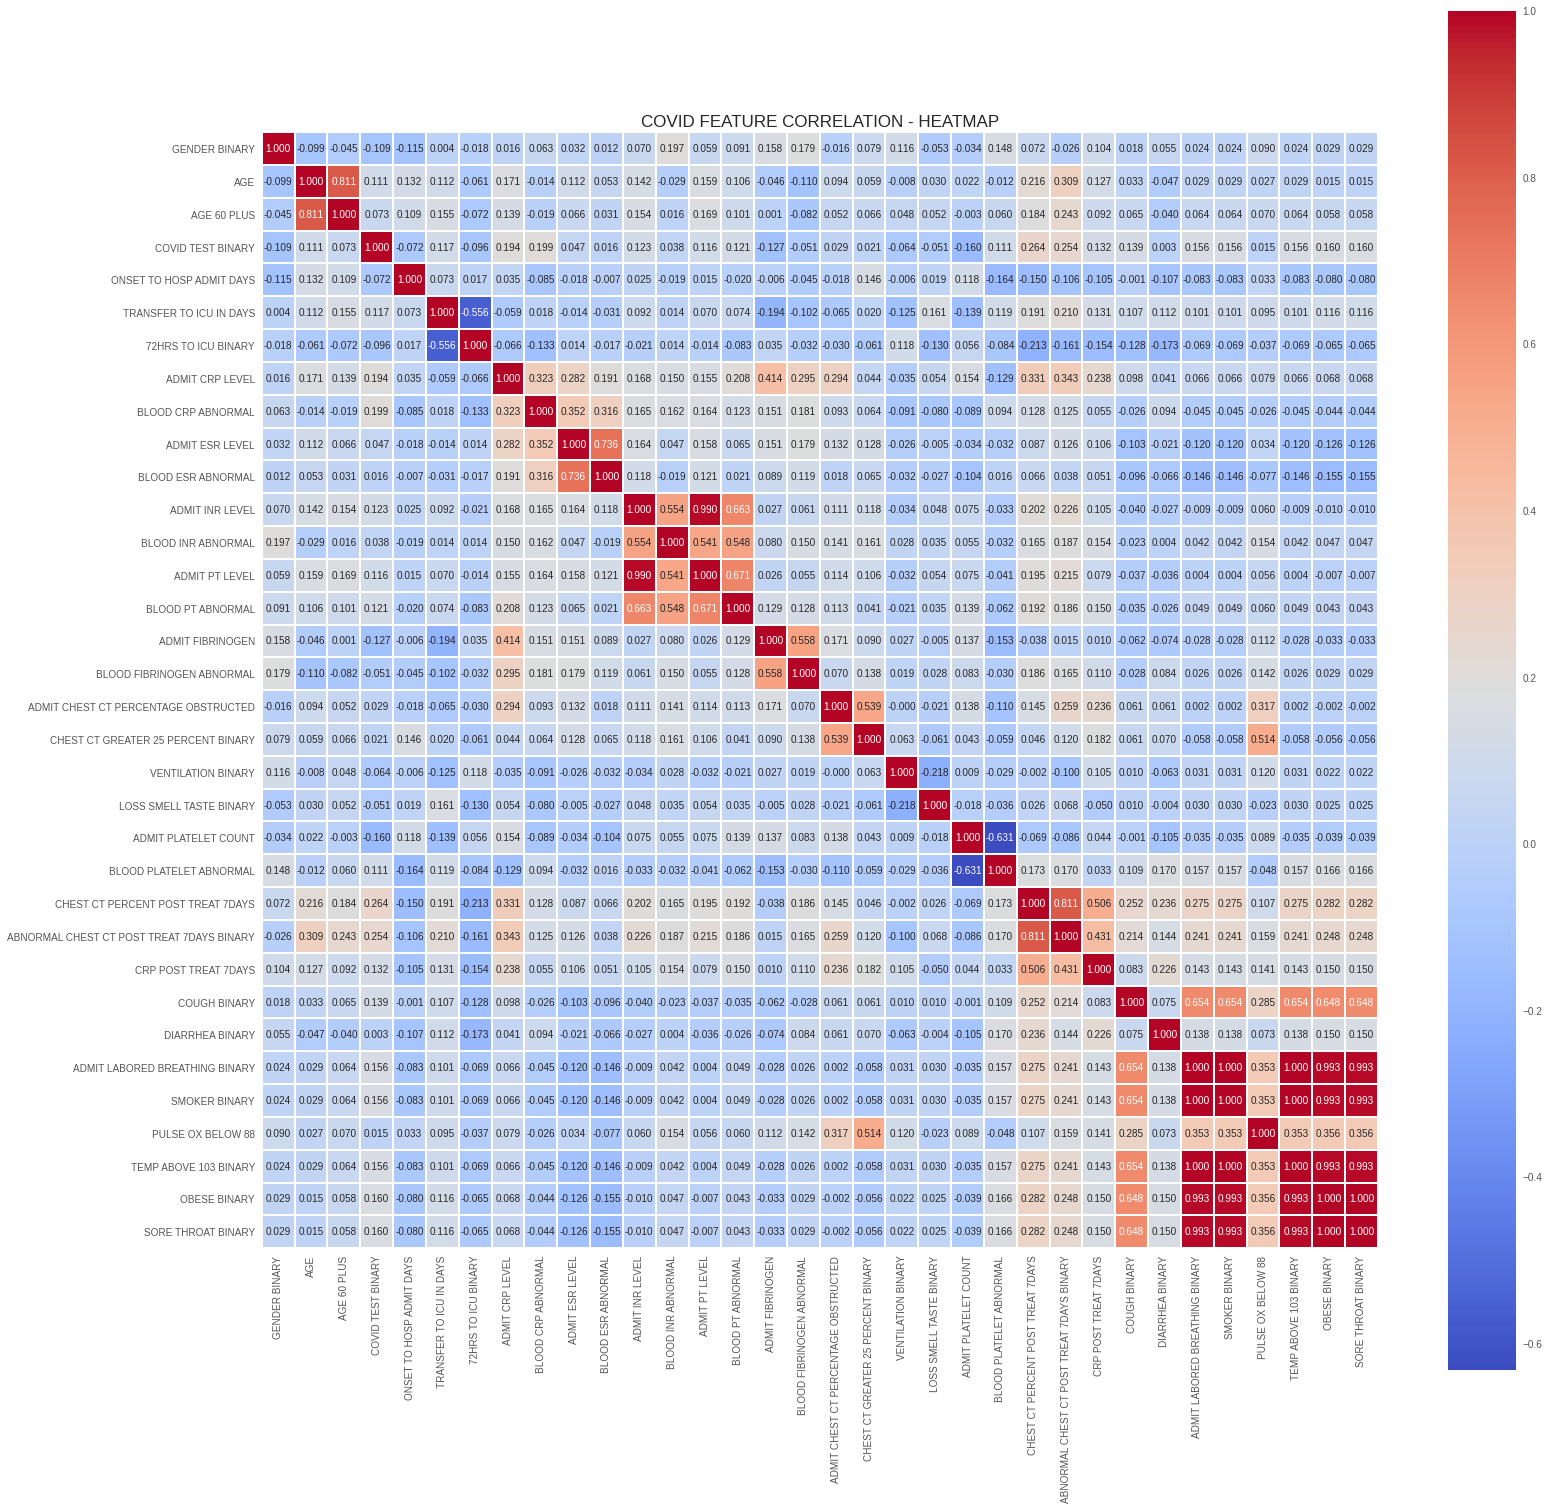

In [58]:
# Correlation Matrix on the "covid" Dataset
corr = covid.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, square=True, cbar=True, annot=True, fmt='.3f',
            xticklabels=True, yticklabels=True,
            cmap="coolwarm", linewidth=1, ax=ax)
plt.title('COVID FEATURE CORRELATION - HEATMAP', size=17);

Next, let's load addtional analytic features for our modeling tasks.

In [59]:
import time
import warnings
import itertools
import numpy as np
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals.six import StringIO
from sklearn import tree
import scipy.stats as stats
from pandas import set_option
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import scipy
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import warnings
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer


Next, let's take a quick look at the number of patients requiring ventilation.


Let's see those numbers in a bar chart.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


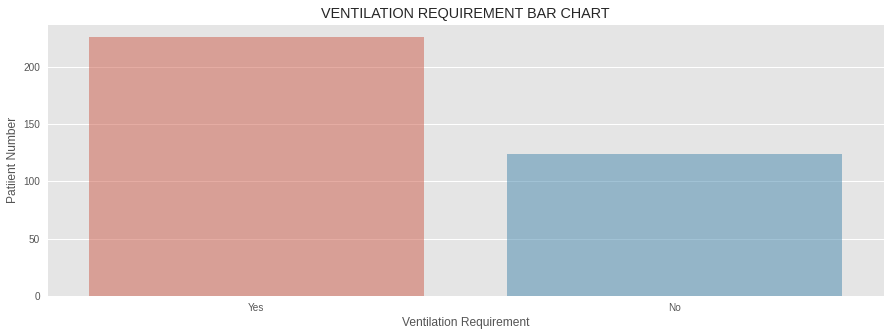

In [60]:
vent_chart = covid['VENTILATION YES/NO'].value_counts()
vent_chart = vent_chart[:7,]
plt.figure(figsize=(15,5))
sns.barplot(vent_chart.index, vent_chart.values, alpha=0.5)
plt.title('VENTILATION REQUIREMENT BAR CHART')
plt.ylabel('Patiient Number')
plt.xlabel('Ventilation Requirement')
plt.show()

Based on my Proposal Letter from Module One, I will be performing three different modeling blocks. BLOCK ONE:  Ventilation Vs. Pusle OX and Chest Scan, Labored Breathing, and 72 Hrs ICU Transfer. BLOCK TWO:  Ventilation Vs. the Blood Markers. BLOCK THREE:  Ventilation Vs. 7 Selected key features; Chest CT w/Greater than 25% Obstruction, Pulse OX below 88%, Age - 60 Yrs, No Loss of Taste or Smell, Transfer to ICU, Abnormal CRP and Labored Breathing.

Finally, BLOCK THREE modeling: Ventilation Vs. Key Features based on our exploratory analysis. 

In [66]:
features_covid = covid[['VENTILATION BINARY','OBESE BINARY','BLOOD PT ABNORMAL','CHEST CT GREATER 25 PERCENT BINARY','LOSS SMELL TASTE BINARY','AGE 60 PLUS','ADMIT LABORED BREATHING BINARY','PULSE OX BELOW 88']]
features_covid.head(5)

,VENTILATION BINARY,OBESE BINARY,BLOOD PT ABNORMAL,CHEST CT GREATER 25 PERCENT BINARY,LOSS SMELL TASTE BINARY,AGE 60 PLUS,ADMIT LABORED BREATHING BINARY,PULSE OX BELOW 88
0,0,0,0,1,1,1,0,0
1,1,0,1,1,0,0,0,0
2,1,0,0,1,0,1,0,1
3,1,1,1,1,0,1,1,1
4,1,1,1,1,0,0,1,1


Let's look at a HEATMAP of this Data Slice.

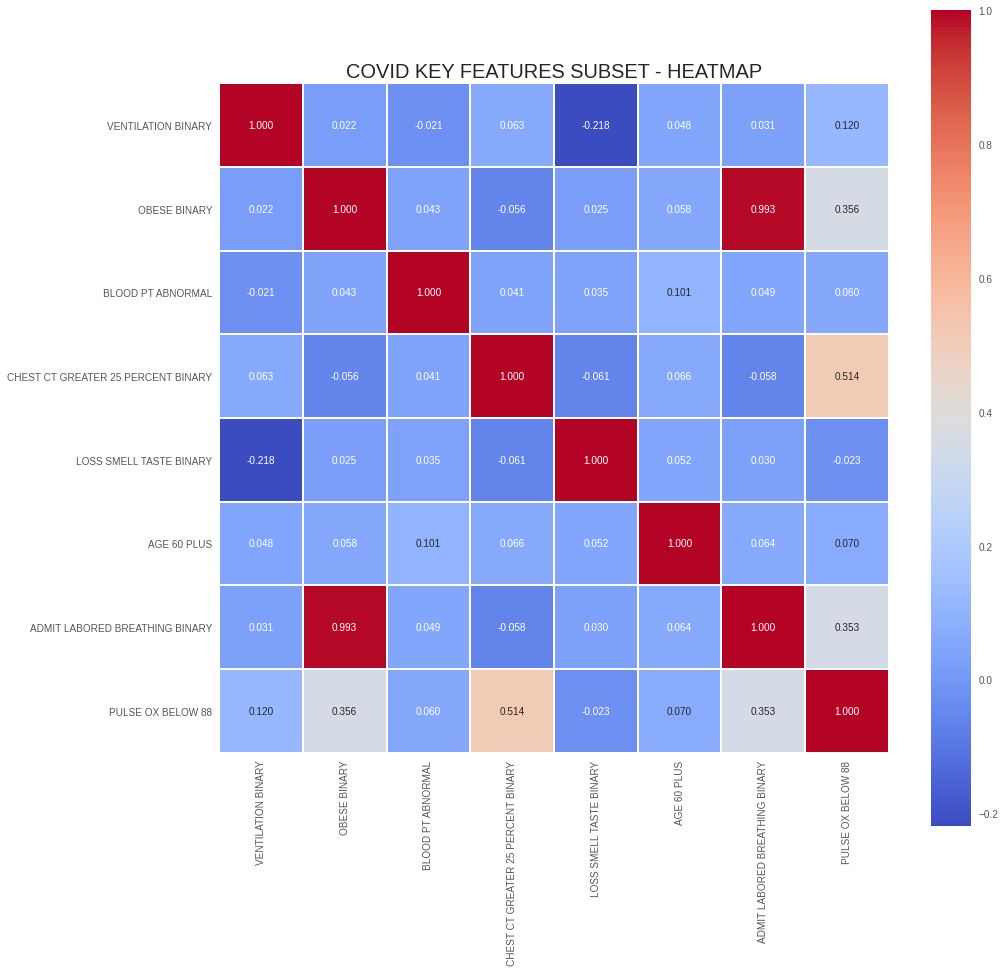

In [67]:
corr = features_covid.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, square=True, cbar=True, annot=True, fmt='.3f',
            xticklabels=True, yticklabels=True,
            cmap="coolwarm", linewidth=1, ax=ax)
plt.title('COVID KEY FEATURES SUBSET - HEATMAP', size=20);

**PARAMETER CHANGES:**
After runing code to determine the best CV value, the following changes have been made:

Train Test Split values changed to 80% Train and 20% Test

Cross Validation values changed from 5 to 3 based on the "Eblow Graph"

Random State changed from "123" to "42"

Ok, now we can begin the initally modeling with BLOCK 3 (Key Features) by using TRAIN TEST SPLIT.

In [68]:
# This will split the "festures_covid" subset into training (80%) and testing (20%) sets.
X = features_covid.drop('VENTILATION BINARY', axis=1)
y = features_covid['VENTILATION BINARY']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, stratify=y, random_state=42)

print('Training Set: ', X_train.shape, y_train.shape)
print('Testing Set: ', X_test.shape, y_test.shape)

Training Set:  (280, 7) (280,)
Testing Set:  (70, 7) (70,)


In [69]:
# Let's setup the Hyperparameter Grid for Logistic Regression
param_grid = {'C': np.logspace(-5, 8, 15)}

# Define the Logistic Regression Classifier
logreg = LogisticRegression()

# Define the Randomized Search CV
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=3, random_state=42)

# Fit it to the Dataset
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and the score
print("Tuned Logistric Regression Parameters:  {}".format(logreg_cv.best_params_))

Tuned Logistric Regression Parameters:  {'C': 1e-05}


Ok, we now have our "C" parameter for Logistic Regression (0.00005). Next we will run Logistic Regression.

Accuary: 0.6428571428571429

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.64      1.00      0.78        45

    accuracy                           0.64        70
   macro avg       0.32      0.50      0.39        70
weighted avg       0.41      0.64      0.50        70


Average 5-Fold CV Score: 0.6457 , Standard Deviation: 0.0035


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


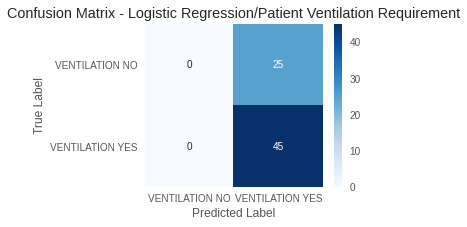

In [70]:
LR = LogisticRegression(C=0.00005, random_state=42)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuary:', metrics.accuracy_score(y_pred, y_test))

## 3-Fold CV
cv_scores = cross_val_score(LR, X, y, cv=3)

# Print the 3-Fold Cross-Val Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard Deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt='d',
            xticklabels = ['VENTILATION NO', 'VENTILATION YES'],
            yticklabels = ['VENTILATION NO', 'VENTILATION YES'])

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matrix - Logistic Regression/Patient Ventilation Requirement");


Next, the Decision Tree Classifier


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.64      1.00      0.78        45

    accuracy                           0.64        70
   macro avg       0.32      0.50      0.39        70
weighted avg       0.41      0.64      0.50        70


Average 3-Fold CV Score: 0.4247 , Standard Deviation: 0.26


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree/Patient Ventilation Requirement')

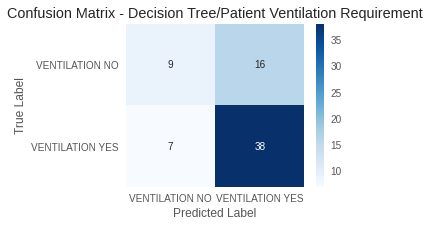

In [71]:
# Let's run a Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


## 3-Fold Cross-Validation
cv_scores = cross_val_score(dtc, X, y, cv=3)

# Print the 5-Fold Cross Validation Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 3-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard Deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,dtc.predict(X_test))
sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt='d',
            xticklabels = ['VENTILATION NO', 'VENTILATION YES'],
            yticklabels = ['VENTILATION NO', 'VENTILATION YES'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matrix - Decision Tree/Patient Ventilation Requirement")


In [72]:
# Let's see the Accuracy Evaluation for the DT
yhat = dtc.predict(X_test)
print('Training Set Accuracy: ', metrics.accuracy_score(y_train, dtc.predict(X_train)))
print('Test Set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Training Set Accuracy:  0.6607142857142857
Test Set Accuracy:  0.6714285714285714


Finally, we will run a Random Forest Classifier against the "features_covid" sub slice.

In [73]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=7).fit(X_train, y_train)
yhatRF = rfc.predict(X_test)
print('Training Set Accuracy:', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Testing Set Accuracy: ', metrics.accuracy_score(y_test, yhatRF))

Training Set Accuracy: 0.6928571428571428
Testing Set Accuracy:  0.6285714285714286


In [74]:
# RFC with Grid Search and Cross Validation.
rfc_params = {'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'min_samples_split':[2,5,10,20]}

grid_rfc = GridSearchCV(RandomForestClassifier(),
                        rfc_params,
                        cv=3,
                        scoring='accuracy').fit(X_train, y_train)

yhatGS = grid_rfc.predict(X_test)

print('Training Set Accuracy:', metrics.accuracy_score(y_train, grid_rfc.predict(X_train)))
print('Testing Set Accuracy:', metrics.accuracy_score(y_test, yhatGS))


Training Set Accuracy: 0.6464285714285715
Testing Set Accuracy: 0.6428571428571429


Next, we will run 3 Fold Cross Validation and print out the Confusion Matrix for Random Forest.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.64      1.00      0.78        45

    accuracy                           0.64        70
   macro avg       0.32      0.50      0.39        70
weighted avg       0.41      0.64      0.50        70


Average 3-Fold CV Scores: 0.4133 , Standard Deviation: 0.239


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


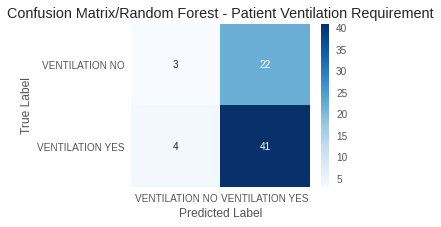

In [75]:
## 3-Fold Cross Validation
cv_scores = cross_val_score(rfc, X, y, cv=3)

# Print the 3-Fold Cross Validation Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 3-Fold CV Scores: {}".format(round(np.mean(cv_scores),4)),
      ", Standard Deviation: {}".format(round(np.std(cv_scores),4)))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt='d',
            xticklabels = ['VENTILATION NO', 'VENTILATION YES'],
            yticklabels = ['VENTILATION NO', 'VENTILATION YES'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matrix/Random Forest - Patient Ventilation Requirement");

Next, I will plot an Eval ROC Graph comparing the 3 Classifiers used in the BLOCK 3 Models.

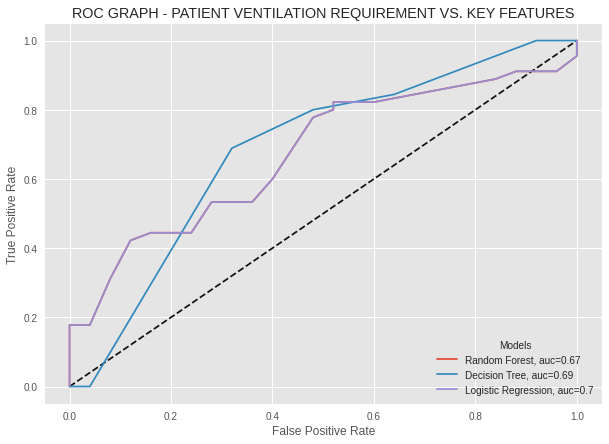

In [76]:
y_pred_proba_RF = rfc.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = dtc.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_LR = LR.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_proba_RF)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

plt.figure(figsize=(10,7))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Logistic Regression, auc="+str(round(auc3,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC GRAPH - PATIENT VENTILATION REQUIREMENT VS. KEY FEATURES')
plt.box(True)
plt.savefig('ImageName', format='png', dpi=200, transparent=False);

Finally, let's run a quick comparision between various Classifiers.

In [77]:
modelRFC = RandomForestClassifier(n_estimators=1000, min_samples_split=10, criterion='gini')
modelRFC.fit(X_train, y_train)

modelETC = ExtraTreesClassifier(n_estimators=1000, min_samples_split=10)
modelETC.fit(X_train, y_train)

modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

scoreRFC = modelRFC.score(X_test, y_test)
scoreETC = modelETC.score(X_test, y_test)
scoreDTC = modelDTC.score(X_test, y_test)
scoreKNN = modelKNN.score(X_test, y_test)
scoreLR = modelLR.score(X_test, y_test)

print('Random Forest', scoreRFC)
print('Extra Tree Classifier', scoreETC)
print('Decision Tree', scoreDTC)
print('KNN', scoreKNN)
print('Logistic Regression', scoreLR)

Random Forest 0.6
Extra Tree Classifier 0.6142857142857143
Decision Tree 0.6285714285714286
KNN 0.6285714285714286
Logistic Regression 0.6428571428571429


Let's graph this for a better view of the results.

Text(0, 0.5, 'Model')

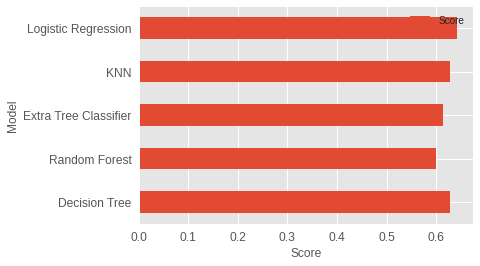

In [78]:
pd.DataFrame([("Decision Tree", scoreDTC),
              ("Random Forest", scoreRFC),
              ("Extra Tree Classifier", scoreETC),
              ("KNN", scoreKNN),
              ("Logistic Regression", scoreLR),],
              columns=["Model", "Score"]).plot(x="Model", y="Score", kind="barh", fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packa

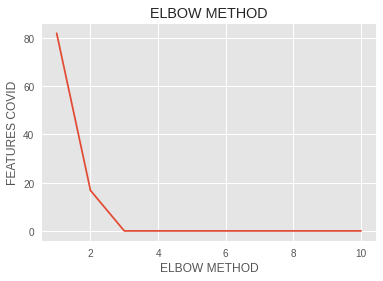

In [31]:
#Elbow Method
X = features_covid.iloc[:,[1,2]].values
features_covid = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  features_covid.append(kmeans.inertia_)

plt.plot(range(1, 11), features_covid)
plt.title('ELBOW METHOD')
plt.xlabel('ELBOW METHOD')
plt.ylabel('FEATURES COVID')
plt.show()